GeoTIFF Metadata:
{'driver': 'GTiff', 'dtype': 'uint16', 'nodata': None, 'width': 28800, 'height': 18000, 'count': 1, 'crs': CRS.from_epsg(4326), 'transform': Affine(0.0041666667, 0.0, 59.99791666665,
       0.0, -0.0041666667, 75.00208333335), 'blockysize': 1, 'tiled': False, 'interleave': 'band'}
BoundingBox(left=59.99791666665, bottom=0.0020827333499937595, right=179.99791762665, top=75.00208333335)


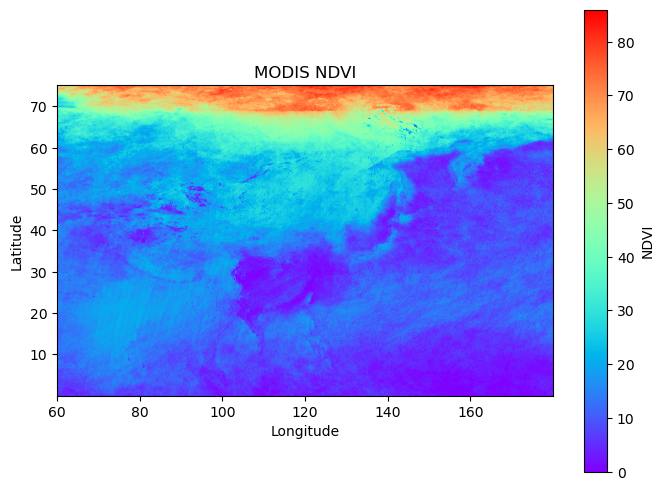

In [30]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt
from rasterio.plot import show

# Open the GeoTIFF file
geo_tiff_path = r'C:\Users\rishi\ml_projects\climate\SVDNB_npp_20190101-20190131_75N060E_vcmslcfg_v10_c201905201300.cf_cvg.tif'  # Replace with your file path
#C:\Users\rishi\ml_projects\climate\SVDNB_npp_20190101-20190131_00N060E_vcmslcfg_v10_c201905201300.cf_cvg.tif
with rasterio.open(geo_tiff_path) as src:
    # Read the first band (MODIS data can have multiple bands)
    band1 = src.read(1)
    # Get metadata
    profile = src.profile
    print("GeoTIFF Metadata:")
    print(profile)
    bbox=src.bounds
    print(bbox)
    # Get the affine transformation
    transform = src.transform
    
    # Calculate the extent of the image for plotting
    # Extent is defined as (xmin, xmax, ymin, ymax) in the image's coordinate system
    xmin, ymax = transform * (0, 0)
    xmax, ymin = transform * (band1.shape[1], band1.shape[0])
    extent = [xmin, xmax, ymin, ymax]
    
    # Plot the data
    plt.figure(figsize=(8, 6))
    plt.imshow(band1, cmap='rainbow', extent=extent)  # Use the 'extent' to set the correct coordinates
    plt.title('MODIS NDVI')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.colorbar(label='NDVI')
    plt.show()


In [24]:

print(band1[410])

[ 0.02 -0.04  0.   ...  0.02 -0.13 -0.16]


In [31]:
from osgeo import gdal
# Define the target bounding box (xmin, ymin, xmax, ymax)
# These are the coordinates of the bounding box you want to crop to.
target_bbox = [78.00405826, 16.93264351, 79.04971836, 17.90150706]

# Path for the output cropped image
output_image = 'cropped_ntl_2_image.tif'

# Open the image using GDAL
dataset = gdal.Open(geo_tiff_path)

# Crop the image using gdal.Warp
gdal.Warp(output_image, dataset, outputBounds=target_bbox)

# Close the dataset
dataset = None

GeoTIFF Metadata:
{'driver': 'GTiff', 'dtype': 'uint16', 'nodata': None, 'width': 251, 'height': 233, 'count': 1, 'crs': CRS.from_epsg(4326), 'transform': Affine(0.0041659764940239295, 0.0, 78.00405826,
       0.0, -0.004158212660944214, 17.90150706), 'blockysize': 16, 'tiled': False, 'interleave': 'band'}
BoundingBox(left=78.00405826, bottom=16.93264351, right=79.04971836, top=17.90150706)


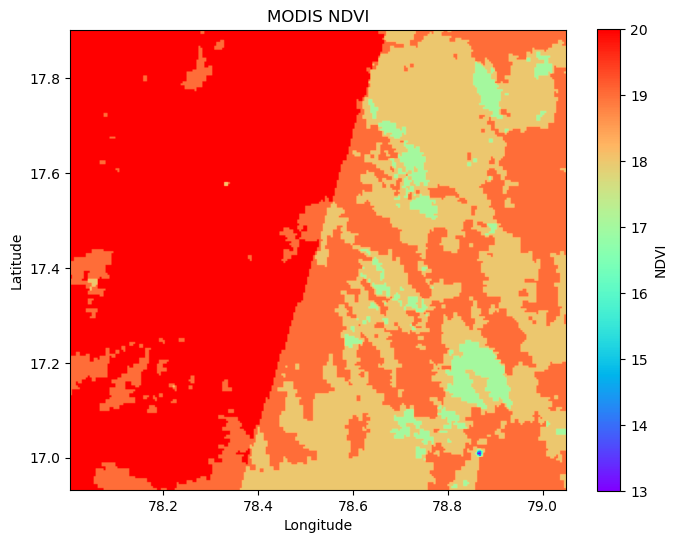

In [33]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt
from rasterio.plot import show

# Open the GeoTIFF file
geo_tiff_path = 'cropped_ntl_2_image.tif'  # Replace with your file path

with rasterio.open(geo_tiff_path) as src:
    # Read the first band (MODIS data can have multiple bands)
    band1 = src.read(1)
    
    # Get metadata
    profile = src.profile
    print("GeoTIFF Metadata:")
    print(profile)
    bbox=src.bounds
    print(bbox)
    # Get the affine transformation
    transform = src.transform
    
    # Calculate the extent of the image for plotting
    # Extent is defined as (xmin, xmax, ymin, ymax) in the image's coordinate system
    xmin, ymax = transform * (0, 0)
    xmax, ymin = transform * (band1.shape[1], band1.shape[0])
    extent = [xmin, xmax, ymin, ymax]
    
    # Plot the data
    plt.figure(figsize=(8, 6))
    plt.imshow(band1, cmap='rainbow', extent=extent)  # Use the 'extent' to set the correct coordinates
    plt.title('MODIS NDVI')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.colorbar(label='NDVI')
    plt.show()


In [37]:
print(band1[50])

[20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20
 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20
 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20
 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20
 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20
 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 19
 19 19 19 19 19 19 19 19 19 19 19 19 18 17 17 17 17 17 17 17 17 17 17 18
 17 17 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18
 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 19 19 18 18 18 19 19 19
 19 18 18 18 17 17 18 18 19 19 19 19 18 18 18 19 19 19 19 19 19 19 19 19
 19 19 19 19 19 19 19 19 19 19 19]


GeoTIFF Metadata:
{'driver': 'GTiff', 'dtype': 'float32', 'nodata': None, 'width': 251, 'height': 233, 'count': 1, 'crs': CRS.from_epsg(4326), 'transform': Affine(0.0041659764940239295, 0.0, 78.00405826,
       0.0, -0.004158212660944214, 17.90150706), 'blockysize': 8, 'tiled': False, 'interleave': 'band'}
BoundingBox(left=78.00405826, bottom=16.93264351, right=79.04971836, top=17.90150706)


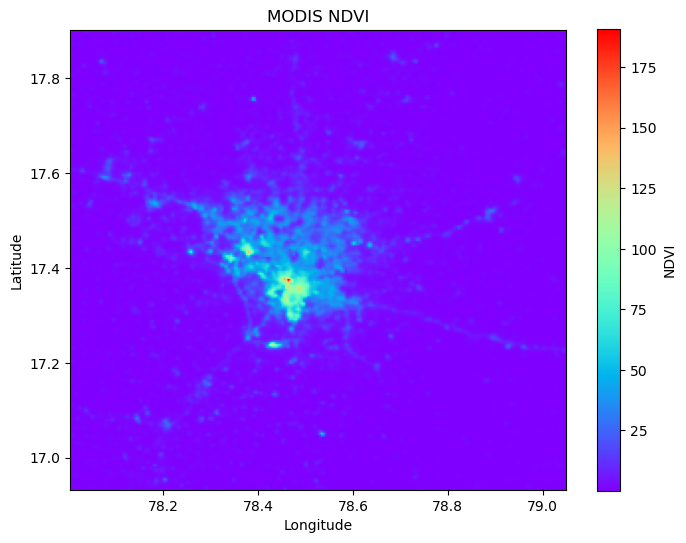

In [46]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt
from rasterio.plot import show

# Open the GeoTIFF file
geo_tiff_path = 'cropped_ntl_image.tif'  # Replace with your file path

with rasterio.open(geo_tiff_path) as src:
    # Read the first band (MODIS data can have multiple bands)
    band1 = src.read(1)
    
    # Get metadata
    profile = src.profile
    print("GeoTIFF Metadata:")
    print(profile)
    bbox=src.bounds
    print(bbox)
    # Get the affine transformation
    transform = src.transform
    
    # Calculate the extent of the image for plotting
    # Extent is defined as (xmin, xmax, ymin, ymax) in the image's coordinate system
    xmin, ymax = transform * (0, 0)
    xmax, ymin = transform * (band1.shape[1], band1.shape[0])
    extent = [xmin, xmax, ymin, ymax]
    
    # Plot the data
    plt.figure(figsize=(8, 6))
    plt.imshow(band1, cmap='rainbow', extent=extent)  # Use the 'extent' to set the correct coordinates
    plt.title('MODIS NDVI')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.colorbar(label='NDVI')
    plt.show()


In [47]:
print(max(band1[100]))

45.0
